In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Dataset salary 2024.csv')
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary              16534 non-null  int64 
 5   salary_currency     16534 non-null  object
 6   salary_in_usd       16534 non-null  int64 
 7   employee_residence  16534 non-null  object
 8   remote_ratio        16534 non-null  int64 
 9   company_location    16534 non-null  object
 10  company_size        16534 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [ ]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,16534.000000,1.653400e+04,16534.000000,16534.000000
mean,2023.226866,1.637270e+05,149686.777973,32.003750
std,0.713558,3.402057e+05,68505.293156,46.245158
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.017630e+05,101125.000000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.872000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [ ]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
16529    False
16530    False
16531    False
16532    False
16533    False
Length: 16534, dtype: bool

In [ ]:
df.count()

work_year             16534
experience_level      16534
employment_type       16534
job_title             16534
salary                16534
salary_currency       16534
salary_in_usd         16534
employee_residence    16534
remote_ratio          16534
company_location      16534
company_size          16534
dtype: int64

In [ ]:
df = df.rename(
    columns=
    {
        'salary_currency': 'currency',
        'company_location': 'location',
        'company_size': 'size'
    }
).copy()

df.head()

,work_year,experience_level,employment_type,job_title,salary,currency,salary_in_usd,employee_residence,remote_ratio,location,size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


In [ ]:
df.nunique()

work_year                5
experience_level         4
employment_type          4
job_title              155
salary                2560
currency                23
salary_in_usd         2939
employee_residence      88
remote_ratio             3
location                77
size                     3
dtype: int64

In [ ]:
currency_list = df['currency'].unique()
print('List of currency:')
print(currency_list)

company_loc = df['location'].unique()
print('List of company location:')
print(company_loc)

List of currency:
['USD' 'GBP' 'CAD' 'EUR' 'DKK' 'INR' 'ILS' 'BRL' 'CHF' 'NZD' 'AUD' 'PLN'
 'PHP' 'TRY' 'NOK' 'JPY' 'ZAR' 'HKD' 'SGD' 'THB' 'HUF' 'MXN' 'CLP']
List of company location:
['US' 'AU' 'GB' 'CA' 'NL' 'LT' 'DK' 'FR' 'ZA' 'NZ' 'AR' 'ES' 'KE' 'LV'
 'IN' 'DE' 'IL' 'FI' 'AT' 'BR' 'CH' 'AE' 'PL' 'SA' 'UA' 'EG' 'PH' 'TR'
 'OM' 'MX' 'PT' 'BA' 'IT' 'AS' 'IE' 'EE' 'MT' 'HU' 'LB' 'RO' 'VN' 'NG'
 'LU' 'GI' 'CO' 'SI' 'GR' 'MU' 'RU' 'KR' 'CZ' 'QA' 'GH' 'SE' 'AD' 'EC'
 'NO' 'JP' 'HK' 'CF' 'SG' 'TH' 'HR' 'AM' 'PK' 'IR' 'BS' 'PR' 'BE' 'ID'
 'MY' 'HN' 'DZ' 'IQ' 'CN' 'CL' 'MD']


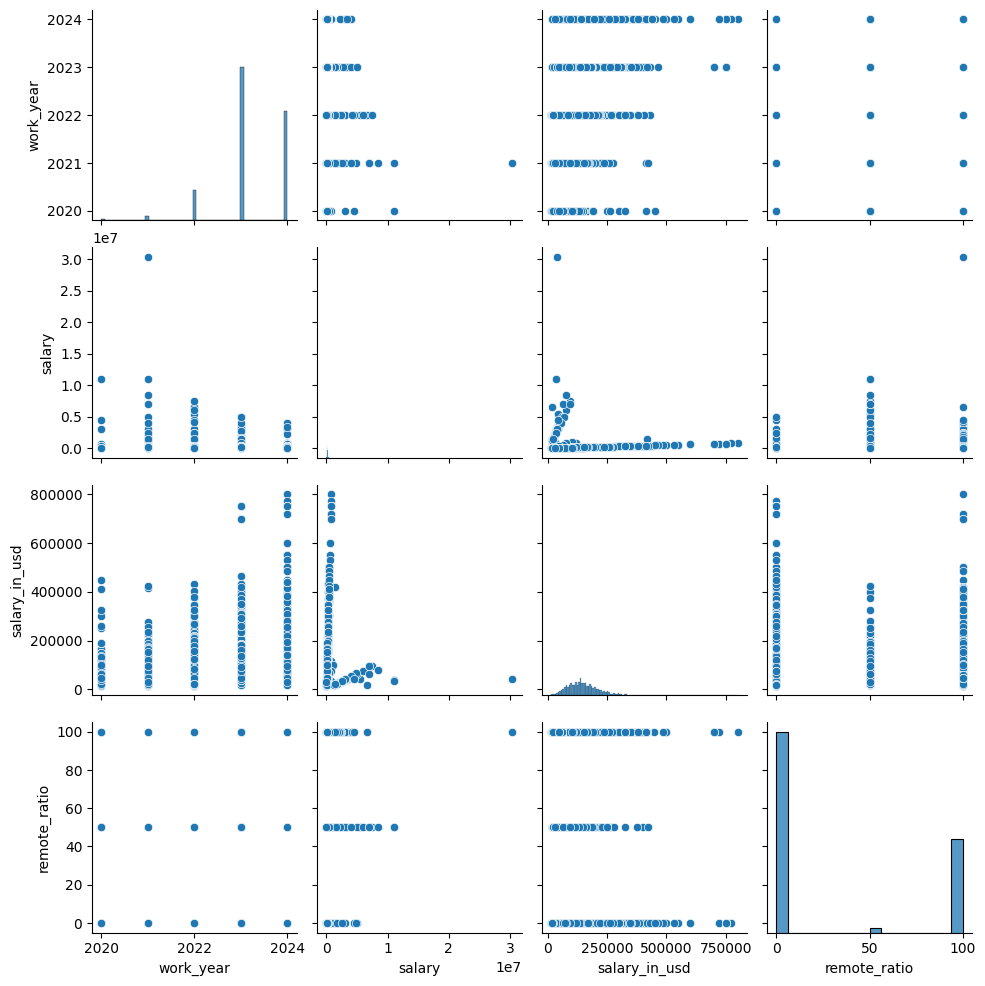

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
# General Salary Analysis
# What are the top 10 highest-paying job titles?
# How does salary in USD differ between full-time and part-time employees?
# How does the average salary in USD vary by experience level?

What are the top 10 highest-paying job titles?

In [ ]:
top_avg_salary_USD = df.groupby('job_title')['salary_in_usd'] \
.mean().round(2) \
.sort_values(ascending=False) \
.head(10)

print('Top 10 Highest-Paying Job Titles:')
print(top_avg_salary_USD)

Top 10 Highest-Paying Job Titles:
job_title
Analytics Engineering Manager     399880.00
Data Science Tech Lead            375000.00
Head of Machine Learning          299758.43
Managing Director Data Science    280000.00
AWS Data Architect                258000.00
AI Architect                      252551.24
Cloud Data Architect              250000.00
Director of Data Science          218775.33
Head of Data                      211860.20
Prompt Engineer                   205093.59
Name: salary_in_usd, dtype: float64


205093.59


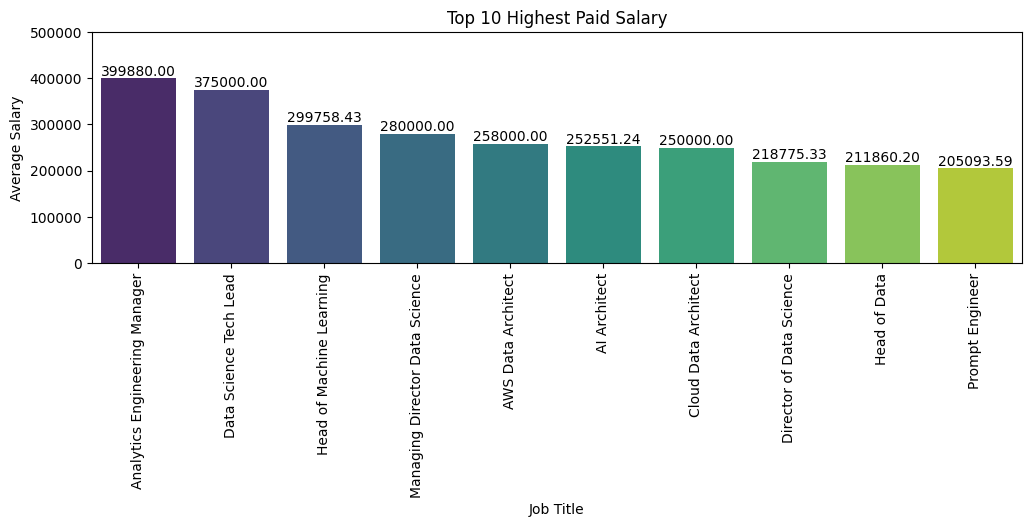

In [ ]:
plt.figure(figsize=(12, 3))

sns.barplot(
    x=top_avg_salary_USD.index,
    y=top_avg_salary_USD.values,
    palette= 'viridis'
)

plt.title('Top 10 Highest Paid Salary')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)
plt.yticks(range(0,550000,100000))

for i in range(len(top_avg_salary_USD)):
    plt.text(i,
             top_avg_salary_USD[i],
             f'{top_avg_salary_USD[i]:.2f}',
             ha='center',
             va='bottom'
             )
print(top_avg_salary_USD[i])

plt.show()



How does salary in USD differ between full-time and part-time employees?

In [ ]:
salary_emp = df.groupby('employment_type')['salary_in_usd'] \
.mean() \
.round(2)\
.sort_values(ascending=False)

print('Avg Salary based on Employement Type:')
print(salary_emp)

Avg Salary based on Employement Type:
employment_type
FT    149987.69
CT    112578.39
PT     83750.16
FL     49220.86
Name: salary_in_usd, dtype: float64


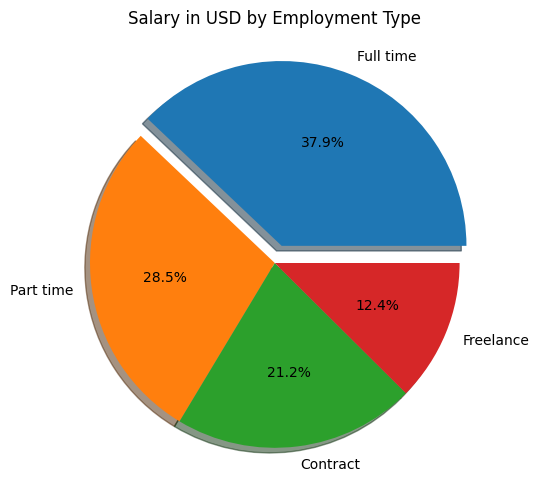

In [ ]:
plt.figure(figsize=(10,6))
exp = [0.1, 0, 0, 0]
indicator = ['Full time', 'Part time', 'Contract', 'Freelance']

plt.pie(salary_emp,
        labels=indicator,
        explode=exp,
        shadow=True,
        autopct='%1.1f%%')
plt.title('Salary in USD by Employment Type')
plt.show()

How does the average salary in USD vary by experience level?

In [ ]:
salary_exp = df.groupby (['experience_level', 'work_year'])['salary_in_usd'] \
.mean() \
.round(2) \
.sort_values(ascending=False) \
.reset_index()

print('Avg Salary based on Experience Level:')
print(salary_exp)

Avg Salary based on Experience Level:
   experience_level  work_year  salary_in_usd
0                EX       2024      202105.81
1                EX       2023      191314.19
2                EX       2022      188260.29
3                EX       2021      186128.00
4                EX       2020      179958.25
5                SE       2024      166815.83
6                SE       2023      165421.03
7                SE       2022      147903.35
8                SE       2020      138648.89
9                MI       2024      134804.00
10               SE       2021      125989.75
11               MI       2023      123821.31
12               MI       2022      102745.58
13               EN       2024       97882.79
14               MI       2020       91870.94
15               EN       2023       91166.31
16               MI       2021       86818.39
17               EN       2022       80018.70
18               EN       2020       69840.67
19               EN       2021       63463

<Figure size 1000x600 with 0 Axes>

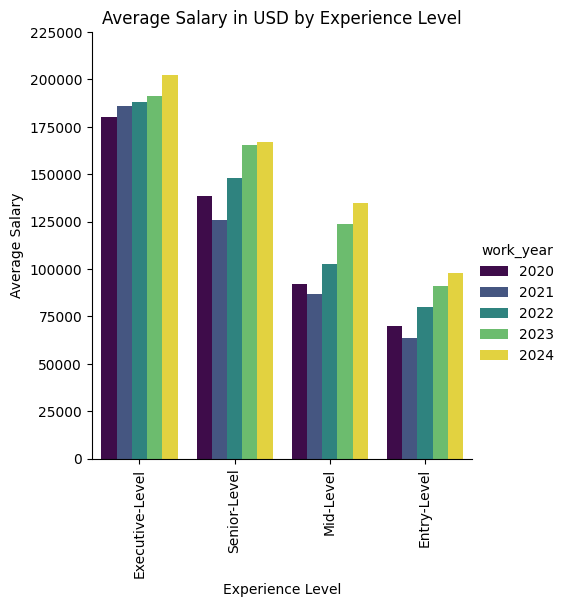

In [ ]:
#rename experience-level to more readable legends
experience_mapping = {
    'EN': 'Entry-Level',
    'MI': 'Mid-Level',
    'SE': 'Senior-Level',
    'EX': 'Executive-Level'
}

salary_exp['experience_level'] = salary_exp['experience_level'].map(experience_mapping)

#---------------------------------------------------------------------------------------#

plt.figure(figsize=(10,6))

sns.catplot(
    data=salary_exp,
    x='experience_level',
    y='salary_in_usd',
    hue='work_year',
    kind='bar',
    palette='viridis'
)

plt.title('Average Salary in USD by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)
plt.yticks(range(0, 250000, 25000))

plt.show()

# Geographic Analysis
What is the average salary in USD by employee residence location?

In [ ]:
country_list = df['employee_residence'].unique()
country_list

array(['US', 'AU', 'GB', 'CA', 'NL', 'LT', 'DK', 'FR', 'ZA', 'NZ', 'AR',
       'ES', 'KE', 'LV', 'GE', 'IN', 'DE', 'IL', 'FI', 'AT', 'HR', 'BR',
       'CH', 'AE', 'GR', 'PL', 'SA', 'UA', 'EG', 'PH', 'TR', 'OM', 'MX',
       'PT', 'BA', 'IT', 'IE', 'EE', 'MT', 'LB', 'RO', 'HU', 'VN', 'NG',
       'CZ', 'PK', 'UG', 'CO', 'SI', 'MU', 'AM', 'TH', 'KR', 'QA', 'RU',
       'TN', 'GH', 'BE', 'AD', 'EC', 'PE', 'MD', 'NO', 'UZ', 'JP', 'HK',
       'CF', 'SG', 'SE', 'KW', 'CY', 'IR', 'AS', 'CN', 'CR', 'CL', 'PR',
       'BO', 'DO', 'ID', 'MY', 'HN', 'DZ', 'IQ', 'BG', 'JE', 'RS', 'LU'],
      dtype=object)

In [ ]:
country_list_mapping = {
      'US': 'United States', 'AU': 'Australia', 'GB': 'United Kingdom', 'CA': 'Canada',
    'NL': 'Netherlands', 'LT': 'Lithuania', 'DK': 'Denmark', 'FR': 'France', 'ZA': 'South Africa',
    'NZ': 'New Zealand', 'AR': 'Argentina', 'ES': 'Spain', 'KE': 'Kenya', 'LV': 'Latvia',
    'GE': 'Georgia', 'IN': 'India', 'DE': 'Germany', 'IL': 'Israel', 'FI': 'Finland',
    'AT': 'Austria', 'HR': 'Croatia', 'BR': 'Brazil', 'CH': 'Switzerland', 'AE': 'United Arab Emirates',
    'GR': 'Greece', 'PL': 'Poland', 'SA': 'Saudi Arabia', 'UA': 'Ukraine', 'EG': 'Egypt',
    'PH': 'Philippines', 'TR': 'Turkey', 'OM': 'Oman', 'MX': 'Mexico', 'PT': 'Portugal',
    'BA': 'Bosnia and Herzegovina', 'IT': 'Italy', 'IE': 'Ireland', 'EE': 'Estonia', 'MT': 'Malta',
    'LB': 'Lebanon', 'RO': 'Romania', 'HU': 'Hungary', 'VN': 'Vietnam', 'NG': 'Nigeria',
    'CZ': 'Czech Republic', 'PK': 'Pakistan', 'UG': 'Uganda', 'CO': 'Colombia', 'SI': 'Slovenia',
    'MU': 'Mauritius', 'AM': 'Armenia', 'TH': 'Thailand', 'KR': 'South Korea', 'QA': 'Qatar',
    'RU': 'Russia', 'TN': 'Tunisia', 'GH': 'Ghana', 'BE': 'Belgium', 'AD': 'Andorra',
    'EC': 'Ecuador', 'PE': 'Peru', 'MD': 'Moldova', 'NO': 'Norway', 'UZ': 'Uzbekistan',
    'JP': 'Japan', 'HK': 'Hong Kong', 'CF': 'Central African Republic', 'SG': 'Singapore',
    'SE': 'Sweden', 'KW': 'Kuwait', 'CY': 'Cyprus', 'IR': 'Iran', 'AS': 'American Samoa',
    'CN': 'China', 'CR': 'Costa Rica', 'CL': 'Chile', 'PR': 'Puerto Rico', 'BO': 'Bolivia',
    'DO': 'Dominican Republic', 'ID': 'Indonesia', 'MY': 'Malaysia', 'HN': 'Honduras',
    'DZ': 'Algeria', 'IQ': 'Iraq', 'BG': 'Bulgaria', 'JE': 'Jersey', 'RS': 'Serbia', 'LU': 'Luxembourg'
}

df['country_name'] = df['employee_residence'].map(country_list_mapping)
df.tail(10)

,work_year,experience_level,employment_type,job_title,salary,currency,salary_in_usd,employee_residence,remote_ratio,location,size,country_name
16524,2021,SE,FT,Director of Data Science,168000,USD,168000,JP,0,JP,S,Japan
16525,2021,MI,FT,Data Scientist,160000,SGD,119059,SG,100,IL,M,Singapore
16526,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L,United States
16527,2021,MI,FT,Data Engineer,24000,EUR,28369,MT,50,MT,L,Malta
16528,2021,SE,FT,Data Specialist,165000,USD,165000,US,100,US,L,United States
16529,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L,United States
16530,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L,United States
16531,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S,United States
16532,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L,United States
16533,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L,India


In [ ]:
import plotly.express as px

avg_salary_country = df.groupby('country_name')['salary_in_usd'] \
.mean() \
.round(2) \
.sort_values(ascending=False) \
.reset_index()

avg_salary_country.head(10)

,country_name,salary_in_usd
0,Qatar,300000.00
1,Israel,262515.00
2,Malaysia,200000.00
3,Puerto Rico,166000.00
4,United States,157169.21
5,New Zealand,146761.25
6,Canada,146334.46
7,Saudi Arabia,139999.33
8,Switzerland,137187.50
9,Egypt,135807.14


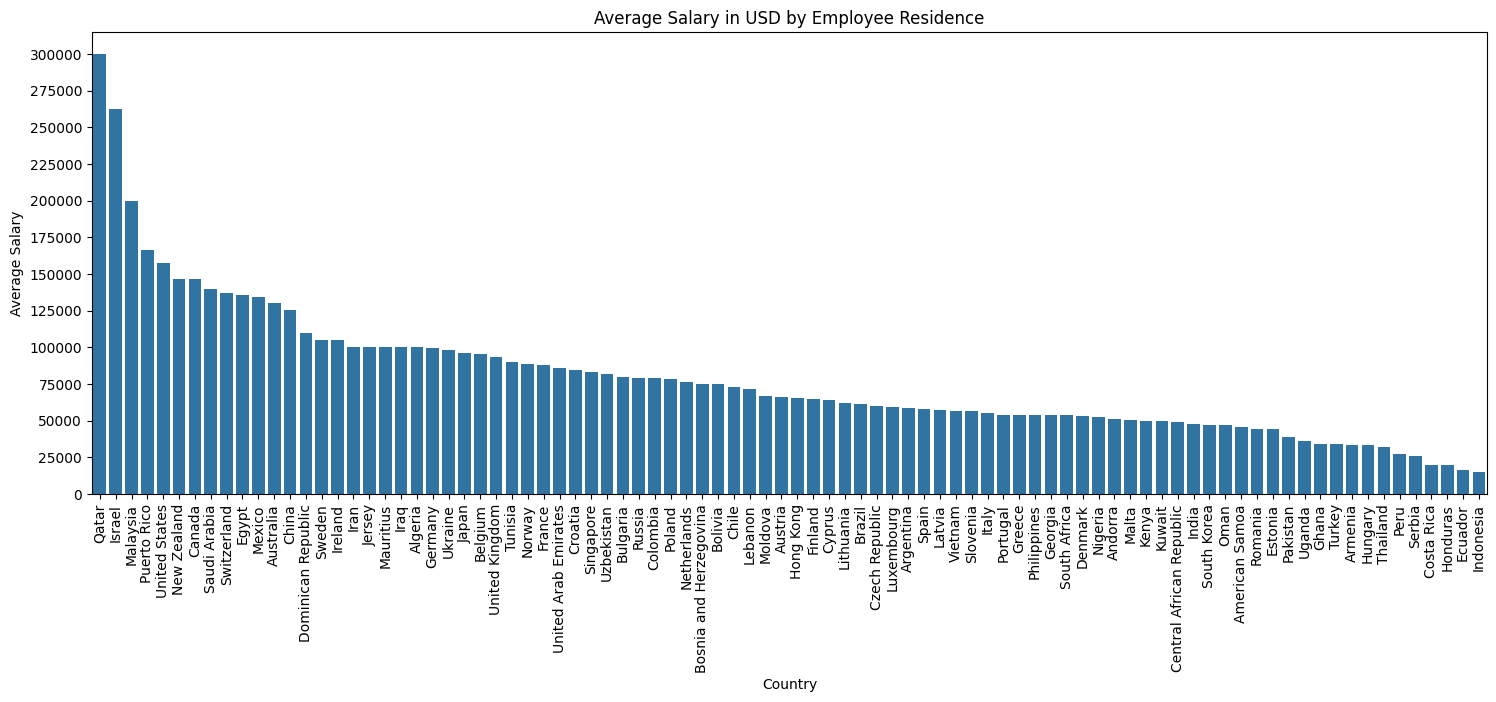

In [ ]:
plt.figure(figsize=(18,6))

sns.barplot(
    data = avg_salary_country,
    x = 'country_name',
    y = 'salary_in_usd',
)

plt.title('Average Salary in USD by Employee Residence')
plt.xlabel('Country')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)
plt.yticks(range(0, 325000, 25000))
plt.show()

In [ ]:
fig = px.choropleth (
    avg_salary_country,
    locations = 'country_name',
    locationmode= 'country names',
    color = 'salary_in_usd',
    color_continuous_scale = 'sunset',
    title = 'Average Salary in USD by Employee Residence',
    labels = {'salary_in_usd' : 'Average Salary',
              'country_name' : 'Country'}
)

fig.update_layout(
    width=1200,  # Set the width of the map
    height=500,  # Set the height of the map
)

fig.show()

In [ ]:
arrangement_count = df['remote_ratio'] \
.value_counts() \
.reset_index()

arrangement_count

,remote_ratio,count
0,0,11118
1,100,5167
2,50,249


In [ ]:
arrangement_count = {
    0 : 'On-Site',
    50 : 'Hybrid',
    100 : 'Remote'
}

df['remote_ratio'] = df['remote_ratio'].map(arrangement_count)
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,currency,salary_in_usd,employee_residence,remote_ratio,location,size,country_name
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,On-Site,US,M,United States
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,On-Site,US,M,United States
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,On-Site,US,M,United States
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,On-Site,US,M,United States
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,On-Site,US,M,United States


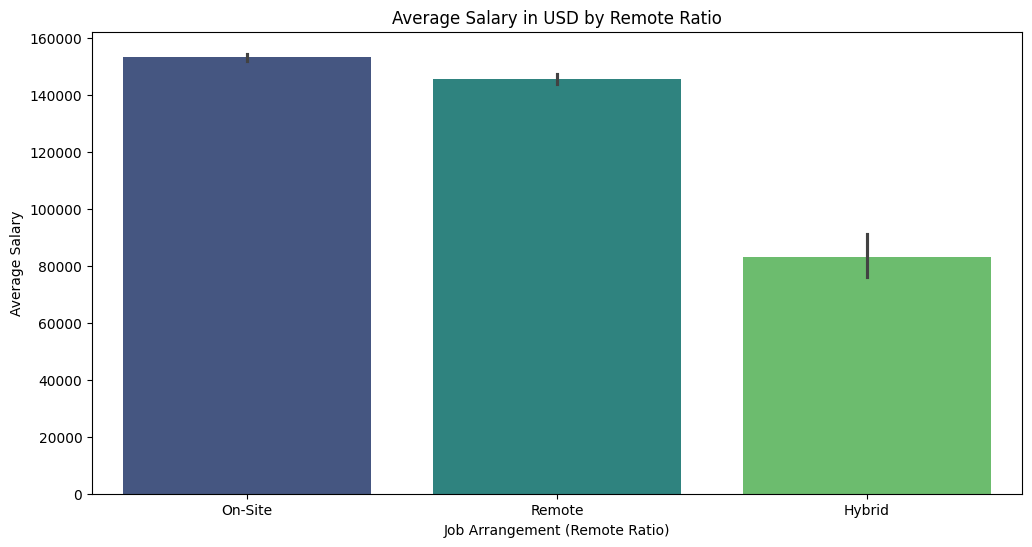

In [ ]:
plt.figure(figsize=(12,6))

sns.barplot(
    data = df,
    x = 'remote_ratio',
    y = 'salary_in_usd',
    palette = 'viridis'
)

plt.title('Average Salary in USD by Remote Ratio')
plt.xlabel('Job Arrangement (Remote Ratio)')
plt.ylabel('Average Salary')

plt.show()

# Thank you!
Please feel free to correct me or provide any tips to help improve my data analysis skills. Your feedback is invaluable to me.